# Introduction

**Aim of the project:**<br> This is an analysis of the Boston Housing Dataset. I will describe the dataset using descriptive statistics, conduct some inferential statistical analysis to determine whether there is a significnat difference in house prices between houses along the Charles river and those that are not, and finally create a neural network using keras to predict the median house price based on other variables in the dataset.

**Background - what is the Boston Housing Dataset?:**<br>
The Boston Housing Dataset contains US Census data from 1970 on houses in various census tracts of Boston. Each sample corresponds to a unique area. It was originally published by Harrisson & Rubenfeld in 1978, in order to determine whether or not clean air had an impact on house prices in Boston. It is available to import from the skikit-learn library in python. The attributes of the dataset are described as follows:<br>
Number of Instances: 506 <br>
Number of Attributes: 13 numeric/categorical predictive. <br>Median Value (attribute 14) is usually the target.<br>
<b>Attribute Information (in order):</b><br>
<b>CRIM</b>     per capita crime rate by town<br>
<b>ZN</b>      proportion of residential land zoned for lots over 25,000 sq.ft.<br>
<b>INDUS</b>    proportion of non-retail business acres per town<br>
<b>CHAS</b>     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)<br>
<b>NOX</b>      nitric oxides concentration (parts per 10 million)<br>
<b>RM</b>       average number of rooms per dwelling<br>
<b>AGE</b>      proportion of owner-occupied units built prior to 1940<br>
<b>DIS</b>      weighted distances to five Boston employment centres<br>
<b>RAD</b>      index of accessibility to radial highways<br>
<b>TAX</b>      full-value property-tax rate per 10000 <br>
<b>PTRATIO</b>  pupil-teacher ratio by town<br>
<b>B</b>        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town<br>
<b>LSTAT</b>    percentage lower status of the population<br>
<b>MEDV</b>     Median value of owner-occupied homes in $1000's<br>


## Part 1 - Describe

### Preliminary investigations:


In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats as st
%matplotlib inline

In [2]:
#import Boston House Prices dataset from https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
from sklearn.datasets import load_boston

In [3]:
#Assign variable 'boston' to the dataset
boston = load_boston()

In [4]:
#take a look at the dataset
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [5]:
#We'll create a pandas dataframe from this data to make it look better
#create pandas dataframe
df = pd.DataFrame(boston.data, columns = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'b', 'ptratio', 'lstat'])

In [6]:
#We need to add the target value to the dataframe - this is the median value of houses and is represented by 'MEDV'
df['MEDV'] = boston.target

In [7]:
#We'll take a look at the first 5 rows
df.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,b,ptratio,lstat,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
#check for null values
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
b          0
ptratio    0
lstat      0
MEDV       0
dtype: int64

No null values found.

We can visualise the relationship between each variable and the target variable using the pairplot function:

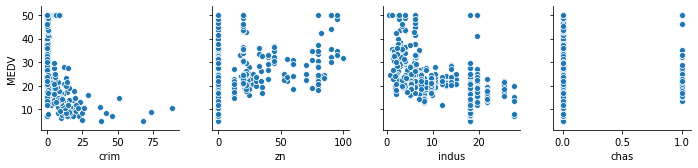

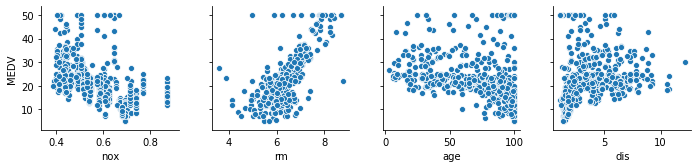

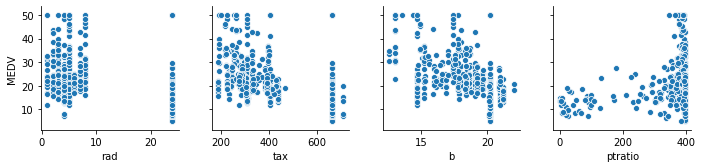

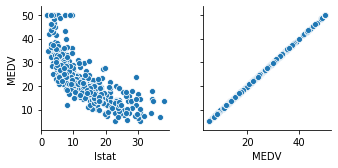

In [9]:
#visualise the relationship between each variable and the target variable using pairplot function
#code adapted from https://dataoutpost.wordpress.com/2018/04/03/eda-part-1-full-python-code/
for i in range(0, len(df.columns), 4):
    sns.pairplot(data=df,
    x_vars=df.columns[i:i+4],
    y_vars=['MEDV'])

We can see from this that the variable RM (no. of rooms) appears to have a linear relationship with the price variable MEDV, which we would expect. We can also see that the variable LSTAT (% lower status of the population) appears to have a negative linear relationship with the price variable. We can fit a regression line to these using seaborn to confirm:

Text(0.5, 1.0, 'Number of Rooms per Dwelling vs. Median Home Value')

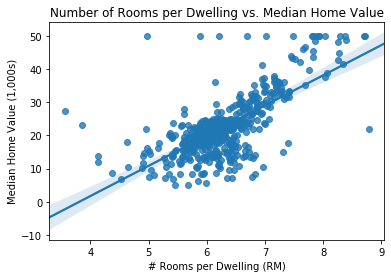

In [10]:
sns.regplot(x="rm", y="MEDV", data = df)
#sns.regplot(x="lstat", y="MEDV", data = df)
plt.xlabel('# Rooms per Dwelling (RM)')
plt.ylabel('Median Home Value (1,000s)')
plt.title('Number of Rooms per Dwelling vs. Median Home Value')


Text(0.5, 1.0, 'Percentage of Population in Lower Economic Status vs. Median Home Value')

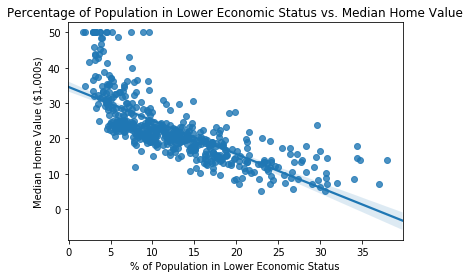

In [11]:
sns.regplot(x="lstat", y="MEDV", data = df)
plt.xlabel('% of Population in Lower Economic Status')
plt.ylabel('Median Home Value ($1,000s)')
plt.title('Percentage of Population in Lower Economic Status vs. Median Home Value')

The 'MEDV' variable is our target variable, as it reflects the price of the property. Plotting this variable shows a normal distribution with some outliers:

<function matplotlib.pyplot.show(*args, **kw)>

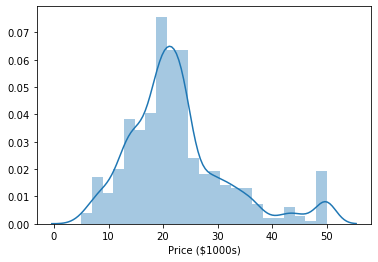

In [12]:
#plot medv values
sns.distplot(df['MEDV'])
plt.xlabel('Price ($1000s)')
plt.show

We can see from this plot that there is a disproportionate number of 'medv' values of 50. This is likely because when the data was being collected the values were in bands, with the highest being 50,000 and above. We will remove these as they skew the data.

In [13]:
#remove MEDV values of 50
df = df[df.MEDV !=50]

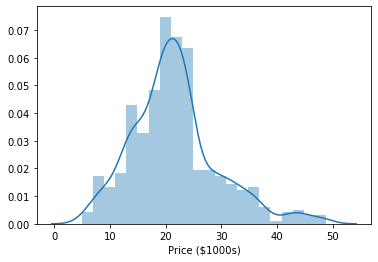

In [14]:
#plot medv values without the 50 values
sns.distplot(df['MEDV'])
plt.xlabel('Price ($1000s)')
plt.show()

Next we'll look at correlations between the variables. A correlation $<=0.25$ or $>=-0.25$ is a weak correlation and should not help us with predictions. 

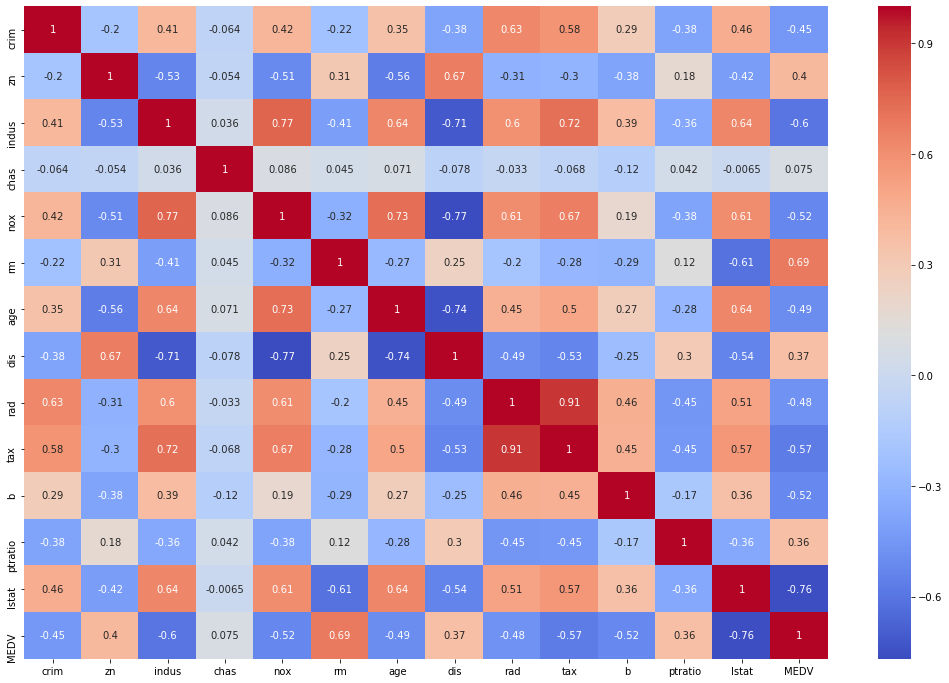

In [15]:
#show correlation between variables
ax, fig = plt.subplots(figsize = (18,12))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()
#blues show a negative correlation, oranges/reds a positive one

From the plot above we can see that the variable with the strongest positive correlation is no. of rooms, and the one with the strongest negative correlation is % of lower status of population. Intuitively it is reasonable that houses with more rooms would cost more, likewise it is a fair assumption that areas with a higher proportion of lower socio-economic residents would have lower prices housing on average. From this there doesn't appear to be a strong correlation between the 'CHAS' variable and house prices.<br>
Finally in this section we'll take a look at the prices variable:

In [16]:
prices = df['MEDV']
features = df.drop('MEDV', axis = 1)
prices.describe()

#look at statistics of the price variable
#code adapted from https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-
#regression-b4e47493633d
minimum_price = np.amin(prices)
maximum_price = np.amax(prices)
mean_price = np.mean(prices)
median_price = np.median(prices)
std_price = np.std(prices)

#Show the calculated statistics
print("Statistics for Boston housing dataset price variable:\n")
print("Minimum: ${}".format(minimum_price)) 
print("Maximum: ${}".format(maximum_price))
print("Mean: ${}".format(mean_price))
print("Median: ${}".format(median_price))
print("Standard deviation: ${}".format(std_price))

Statistics for Boston housing dataset price variable:

Minimum: $5.0
Maximum: $48.8
Mean: $21.635918367346957
Median: $20.9
Standard deviation: $7.857271146580542


### Part 2 - Inferential Statistics

The aim of this section is to determine whether there is a significant difference in median prices of houses that are along the Charles river and those that are not. The Null Hypothesis will be that there is no difference between median house prices whether or not they are along the Charles River. We'll use a T Test to do this. Lets first take a look at the variable 'chas' which is the indicator as to whether the house lies along the river or not. '1' means it does, '0' means it does not. As this is a categorical variable we will use a stripplot to visualise the data:

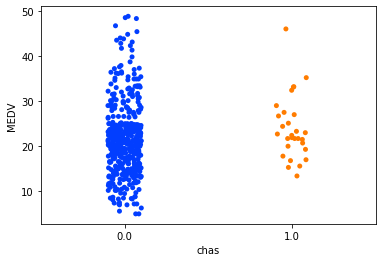

In [17]:
sns.stripplot(x="chas", y = 'MEDV', data = df, palette = 'bright')

From observing the scatterplot above we can see that there are much fewer properties bordering the Charles river than properties that don't border it; it also looks like the highest priced properties are away from the river. <br> Next we'll use a boxplot, which shows the distribution of quantitative data in a way that allows comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using the inter-quartile range method.
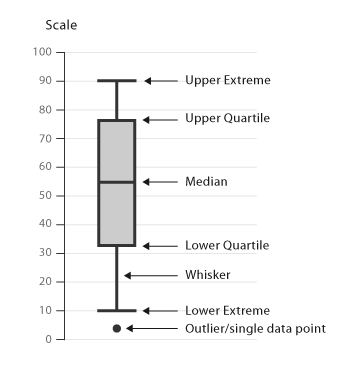


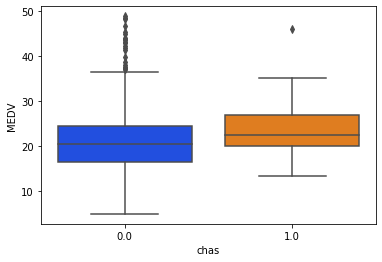

In [18]:
sns.boxplot(x = "chas", y = "MEDV", data = df, palette = 'bright')

We can see that there are a lot of outliers in the properties not bordering the river, and the median price of houses bordering the river appears greater than that of houses not bordering it.
Our null hypothesis is that there is statistically no difference between the median prices of houses that border the Charles River and those that don't. Our alternative hypothesis is that there is statistically a significant difference between the median prices of houses that border the Charles river and those that don't. Lets seperate the variable into its components:

In [19]:
charles = df.drop(['crim','rm','dis','zn','indus','nox','age','rad','tax', 'b','ptratio','lstat'], axis =1)

In [20]:
#group data in chas variable by 1 or 0, either bordering the river or not
group = charles.groupby('chas')
#look at this dataframe
group.describe().head()

MEDV                                                   
      count       mean       std   min   25%   50%   75%   max
chas                                                          
0.0   461.0  21.488503  7.898848   5.0  16.5  20.6  24.5  48.8
1.0    29.0  23.979310  7.024161  13.4  20.0  22.4  27.0  46.0

In [21]:
bound = charles[(charles['chas'] == 1.0)]
notbound = charles[(charles['chas'] == 0.0)]


The independent t-test is an inferential statistical test that determines whether there is a statistically significant difference between the means of two groups. To run an independent t-test we need:<br>
<ul>
    <li>An independent, categorical variable that has two groups (we have the CHAS variable that is divided into two groups, bound and not bound).</li>
<li>A continuous dependent variable (we have the MEDV variable).</li> 
</ul>
There are number of tests that should be performed before performing an independent t-test. <br> 1. The Levene test for equal variances: The Levene test tests the null hypothesis that all input samples are from populations with equal variances. If the p-value of Levene's test is less than some significance level (typically 0.05), the obtained differences in sample variances are unlikely to have occurred based on random sampling from a population with equal variances. Thus, the null hypothesis of equal variances is rejected and it is concluded that there is a difference between the variances in the population. We conduct the Levene test using the stats package in scipy:

In [22]:
from scipy import stats
stats.levene(notbound['MEDV'], bound['MEDV'])

LeveneResult(statistic=0.6887118673011111, pvalue=0.40700864732277753)

The Pvalue is greater than .05, meaning there is homogeneity of variances and we can proceed. <br> <br>2. The second test we need to conduct is to test the assumption of normality - the distributions should be normal. We can use the shapiro test from the stats package in scipy for this:

In [23]:
stats.shapiro(bound['MEDV'])

(0.9188438653945923, 0.028505902737379074)

In [24]:
stats.shapiro(notbound['MEDV'])

(0.9592850804328918, 5.540209957466402e-10)

Since $p>0.5$ for those properties not bordering the Charles river the distribution passes the normality criteria. However $p<.05$ for those properties bordering the river, so this distribution is not normal. We can see this illustrated in the histgrams below:

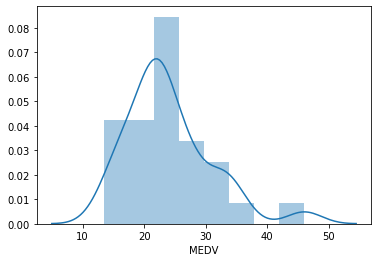

In [25]:
sns.distplot(bound['MEDV'], hist='True')

#plt.show()

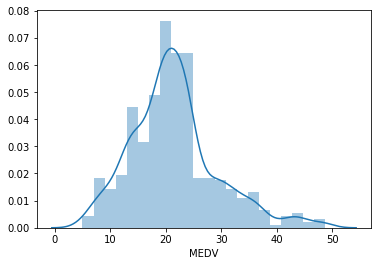

In [26]:
sns.distplot(notbound['MEDV'], hist='True')
#plt.show()

It should be noted that there are a lot fewer data points bounding the river so it is more difficult to make an assumption about normality. It the data isn't normally distributed a non-parametric test should be used. <br> Running an independent t-test gives us the following:

In [27]:
stats.ttest_ind(bound['MEDV'],notbound['MEDV'] )

Ttest_indResult(statistic=1.6571053443179937, pvalue=0.09814089320087695)

#### Interpretation:
To determine if there is a significant difference between the groups we need to set a p-value threshold. If the test produces a p-value which is less than the threshold p-value then the test is said to be significant and that there is a significant difference between the two means. This means one rejects the null hypothesis in support of the alternative. Most commonly the p-value is set to 0.05 , so that's what we'll set it as. The result of the independent t-test is a p value of 0.098. As this is greater that the threshold set we reject the null hypothese that there is no difference in the means of the properties that border the Charles river and those that don't.<br> As there is some doubt regarding the normality of the data we'll also conduct a Welch t test - this is appropriate when the groups have vastly different sizes, as our Charles river groups do:

In [28]:
stats.ttest_ind(bound['MEDV'],notbound['MEDV'], equal_var = False)

Ttest_indResult(statistic=1.8379064458206327, pvalue=0.07519889252702865)

This gives us the same result, i.e. we reject the null hypothesis that there is no difference in the means of the properties that border the Charles river and those that don't.

### Part 3 - Predict

The aim of this section is to use keras to create a neural network that can predict the median house price based on some or all of the other variables in the dataset. A neural network is composed of:
<ul>
    <li>Layers - combine to make a network or model</li>
    <li>Input data and corresponding targets</li>
    <li>Loss function, which defines the feedback signal used for learning</li>
    <li>Optimizer, which determines how learning proceeds</li>
</ul>
The layers map the input data to predictions, the loss function then compares these predictions to the targets, and produce a loss value, which is a measure of how well the predictions match what was expected. 

In [29]:
import tensorflow as tf
import keras as kr
# For splitting data sets.
import sklearn.model_selection as mod
# For whitening.
import sklearn.decomposition as dec
# For preprocessing data.
import sklearn.preprocessing as pre
#split dataframe into target & other variables
x = df.drop('MEDV', axis = 1)
y = df['MEDV']


Using TensorFlow backend.


In [30]:
#split data into testing & training split, 80% train, 20% test
x_train, x_test, y_train, y_test = mod.train_test_split(x, y, test_size=0.2)

In [31]:
x_train.shape


(392, 13)

In [32]:
x_test.shape

(98, 13)

Looking at the data we can see that we have 392 training samples and 98 testing samples, each with thirteen feature variables, as detailed in section 1 above. Our target variable is the median value of houses, in thousands of dollars. 

#### Building & training:<br>
Now we'll build and train our model. As there are not a large number of samples we'll use a small network with two hidden layers. The last layer is linear, so the network is free to predict values in any range. We are using the Mean Squared Error loss function; this is the square of the difference between predictions and targets. It is a widely used loss function for regression problems. We are also measuring the MAE (Mean Absolute Error), which is the absolute value of the difference between predictions and targets.<br>
##### Example 1:

In [55]:
m = kr.models.Sequential()

m.add(kr.layers.Dense(26, input_dim=13, activation="relu"))
m.add(kr.layers.Dense(26, input_dim=13, activation="relu"))
m.add(kr.layers.Dense(1, activation="linear"))

m.compile(loss="mean_squared_error", optimizer="rmsprop", metrics=['mae'])

In [56]:
m.fit(x_train, y_train, epochs=300, batch_size=10)

Epoch 1/300
392/392 [==============================] - 0s 326us/step - loss: 169.5091 - mae: 8.6967
Epoch 2/300
392/392 [==============================] - 0s 102us/step - loss: 48.2831 - mae: 5.4302
Epoch 3/300
392/392 [==============================] - 0s 102us/step - loss: 48.0722 - mae: 5.3141
Epoch 4/300
392/392 [==============================] - 0s 112us/step - loss: 50.5213 - mae: 5.3578
Epoch 5/300
392/392 [==============================] - 0s 92us/step - loss: 45.9248 - mae: 5.2003
Epoch 6/300
392/392 [==============================] - 0s 92us/step - loss: 44.0427 - mae: 5.1398
Epoch 7/300
392/392 [==============================] - 0s 92us/step - loss: 37.7525 - mae: 4.7645
Epoch 8/300
392/392 [==============================] - 0s 92us/step - loss: 41.2945 - mae: 4.9044
Epoch 9/300
392/392 [==============================] - 0s 112us/step - loss: 41.6857 - mae: 4.9663
Epoch 10/300
392/392 [==============================] - 0s 92us/step - loss: 41.5492 - mae: 4.9843
Epoch 11/300


392/392 [==============================] - 0s 92us/step - loss: 24.6305 - mae: 3.8814
Epoch 84/300
392/392 [==============================] - 0s 102us/step - loss: 22.2108 - mae: 3.6515
Epoch 85/300
392/392 [==============================] - 0s 102us/step - loss: 21.5204 - mae: 3.5118
Epoch 86/300
392/392 [==============================] - 0s 112us/step - loss: 21.8754 - mae: 3.6297
Epoch 87/300
392/392 [==============================] - 0s 112us/step - loss: 22.5569 - mae: 3.5837
Epoch 88/300
392/392 [==============================] - 0s 102us/step - loss: 22.8873 - mae: 3.6855
Epoch 89/300
392/392 [==============================] - 0s 112us/step - loss: 21.2693 - mae: 3.4927
Epoch 90/300
392/392 [==============================] - 0s 102us/step - loss: 21.7191 - mae: 3.5682
Epoch 91/300
392/392 [==============================] - 0s 92us/step - loss: 21.9225 - mae: 3.6278
Epoch 92/300
392/392 [==============================] - 0s 92us/step - loss: 21.7180 - mae: 3.5355
Epoch 93/300
392

392/392 [==============================] - 0s 194us/step - loss: 18.3863 - mae: 3.2616
Epoch 164/300
392/392 [==============================] - 0s 194us/step - loss: 15.3598 - mae: 2.9938
Epoch 165/300
392/392 [==============================] - 0s 194us/step - loss: 15.7972 - mae: 3.1172
Epoch 166/300
392/392 [==============================] - 0s 183us/step - loss: 16.1110 - mae: 3.0446
Epoch 167/300
392/392 [==============================] - 0s 183us/step - loss: 16.1014 - mae: 3.0083
Epoch 168/300
392/392 [==============================] - 0s 204us/step - loss: 15.2943 - mae: 2.9742
Epoch 169/300
392/392 [==============================] - 0s 194us/step - loss: 16.6133 - mae: 3.1657
Epoch 170/300
392/392 [==============================] - 0s 183us/step - loss: 15.6549 - mae: 2.9797
Epoch 171/300
392/392 [==============================] - 0s 194us/step - loss: 16.5230 - mae: 3.1595
Epoch 172/300
392/392 [==============================] - 0s 204us/step - loss: 15.0209 - mae: 2.9226
Epoc

392/392 [==============================] - 0s 92us/step - loss: 12.7316 - mae: 2.6904
Epoch 245/300
392/392 [==============================] - 0s 82us/step - loss: 13.9481 - mae: 2.8382
Epoch 246/300
392/392 [==============================] - 0s 102us/step - loss: 13.6955 - mae: 2.7989
Epoch 247/300
392/392 [==============================] - 0s 112us/step - loss: 13.5872 - mae: 2.8074
Epoch 248/300
392/392 [==============================] - ETA: 0s - loss: 12.3431 - mae: 3.09 - 0s 102us/step - loss: 12.3445 - mae: 2.6303
Epoch 249/300
392/392 [==============================] - 0s 92us/step - loss: 12.9657 - mae: 2.7435
Epoch 250/300
392/392 [==============================] - 0s 102us/step - loss: 11.7317 - mae: 2.6157
Epoch 251/300
392/392 [==============================] - 0s 92us/step - loss: 12.7126 - mae: 2.7035
Epoch 252/300
392/392 [==============================] - 0s 92us/step - loss: 13.3676 - mae: 2.7728
Epoch 253/300
392/392 [==============================] - 0s 102us/step -

In [57]:
m.predict(x_test).round().T

array([[15., 25., 30., 40., 16., 33., 37., 31., 19., 12., 26., 24., 20.,
        27., 15., 26., 29., 30., 22., 34., 33., 25., 23., 21., 33., 26.,
        32., 27., 26., 13., 23., 35., 23., 31., 24., 22., 40., 25., 24.,
        26., 22., 26., 21., 23., 20., 21., 17., 27., 20., 17., 23., 38.,
        25., 21., 24., 17., 17., 25., 25., 25., 28., 22., 19., 22., 29.,
        21., 14., 24., 27., 26., 18., 35., 27., 35., 21., 25., 27., 22.,
        32., 20., 27., 16., 26., 28., 26., 23., 36., 38., 31., 17., 20.,
        26., 15.,  8., 26., 25., 25., 25.]], dtype=float32)

In [58]:
y_test.as_matrix().astype(np.float32)

C:\Users\pemtc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([ 8.4, 21.8, 34.7, 33.3, 11. , 31.6, 38.7, 36.2, 14.6, 13.8, 22.9,
       20.1, 11.5, 23.3, 18.6, 19.6, 24.1, 25. , 19.6, 33.4, 33.1, 19.9,
       21.2, 18. , 29.9, 23. , 22.5, 24.7, 20.1, 10.4, 16.2, 31.7, 16.8,
       26.4, 19.8, 17.1, 34.9, 17.4, 22.3, 24.5, 22.2, 23.3, 19.6, 13.8,
       16.3, 12.7, 14.6, 23.7, 15.2, 20.4, 27.9, 35.1, 24.3, 20.3, 22.2,
       19.1, 12.7, 23.1, 21.1, 23.9, 26.4, 18.7, 16.6, 18.5, 41.3, 20.5,
       11.9, 23.9, 23.8, 21.7, 15.6, 42.8, 24.7, 32. , 19.1, 20. , 23.3,
       21.4, 24.6, 22.5, 24. , 13.5, 25. , 23.1, 19.3, 18.2, 32.9, 31.5,
       28.7,  9.7, 19.5, 23.4, 10.9, 13.2, 19.1, 18.5, 20.6, 27.5],
      dtype=float32)

In [59]:
m.evaluate(x_test, y_test)

98/98 [==============================] - 0s 856us/step


[19.75105787783253, 3.785405397415161]

It is good practice to normalise the data, as the values all have different ranges. For each feature of the input data we subtract the mean and divide by the standard deviation of the feature so that the feature is centered around zero. We can do this with keras:<br>
##### Example 2:

In [125]:
scaler = pre.StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
scaler.fit(x_test)
x_test_scaled = scaler.transform(x_test)
print(x_test_scaled)

[[ 1.31260434 -0.43802583  1.12155041 ...  0.80159925 -3.46874244
   1.59381589]
 [-0.44471191 -0.43802583 -0.14253084 ...  0.26537586  0.39926263
  -0.0296898 ]
 [-0.46675878 -0.43802583 -0.53633499 ... -0.48533689  0.35408318
  -1.23710597]
 ...
 [-0.44939246 -0.43802583 -0.09443263 ... -0.48533689  0.30868171
  -0.26572604]
 [-0.4658876  -0.43802583 -0.81891202 ...  0.80159925  0.39082617
  -0.5592583 ]
 [-0.4484337  -0.43802583 -0.31237767 ...  1.17695563  0.37550734
  -0.42157049]]


In [126]:
m = kr.models.Sequential()

m.add(kr.layers.Dense(13, input_dim=13, activation="relu"))
#m.add(kr.layers.Dense(13, activation="tanh"))
m.add(kr.layers.Dense(1, activation="linear"))

m.compile(loss="mean_squared_error", optimizer="adam", metrics = ["mae"])

In [127]:
history=m.fit(x_train_scaled, y_train, epochs=150, validation_split = .2, batch_size=10)

Train on 313 samples, validate on 79 samples
Epoch 1/150
313/313 [==============================] - 0s 932us/step - loss: 484.7055 - mae: 20.4508 - val_loss: 507.0088 - val_mae: 20.7814
Epoch 2/150
313/313 [==============================] - 0s 153us/step - loss: 467.2511 - mae: 20.0062 - val_loss: 489.1629 - val_mae: 20.3394
Epoch 3/150
313/313 [==============================] - 0s 153us/step - loss: 447.0599 - mae: 19.5026 - val_loss: 467.9073 - val_mae: 19.8130
Epoch 4/150
313/313 [==============================] - 0s 140us/step - loss: 423.6264 - mae: 18.9005 - val_loss: 443.4631 - val_mae: 19.1835
Epoch 5/150
313/313 [==============================] - 0s 140us/step - loss: 396.4816 - mae: 18.1898 - val_loss: 414.6820 - val_mae: 18.4457
Epoch 6/150
313/313 [==============================] - 0s 140us/step - loss: 366.4442 - mae: 17.3774 - val_loss: 383.9369 - val_mae: 17.6066
Epoch 7/150
313/313 [==============================] - 0s 153us/step - loss: 334.0125 - mae: 16.4782 - val_lo

313/313 [==============================] - 0s 128us/step - loss: 16.3776 - mae: 3.1495 - val_loss: 17.7087 - val_mae: 3.2419
Epoch 60/150
313/313 [==============================] - 0s 140us/step - loss: 16.1922 - mae: 3.1359 - val_loss: 17.4522 - val_mae: 3.2311
Epoch 61/150
313/313 [==============================] - 0s 128us/step - loss: 15.9792 - mae: 3.1167 - val_loss: 17.4902 - val_mae: 3.2458
Epoch 62/150
313/313 [==============================] - 0s 115us/step - loss: 15.8127 - mae: 3.1001 - val_loss: 17.3362 - val_mae: 3.2231
Epoch 63/150
313/313 [==============================] - 0s 128us/step - loss: 15.6416 - mae: 3.0898 - val_loss: 17.1162 - val_mae: 3.2151
Epoch 64/150
313/313 [==============================] - 0s 128us/step - loss: 15.4978 - mae: 3.0666 - val_loss: 17.0119 - val_mae: 3.1845
Epoch 65/150
313/313 [==============================] - 0s 140us/step - loss: 15.2457 - mae: 3.0465 - val_loss: 16.7945 - val_mae: 3.1778
Epoch 66/150
313/313 [=========================

313/313 [==============================] - 0s 128us/step - loss: 7.8763 - mae: 2.1350 - val_loss: 10.3047 - val_mae: 2.4400
Epoch 119/150
313/313 [==============================] - 0s 128us/step - loss: 7.8018 - mae: 2.1326 - val_loss: 10.3484 - val_mae: 2.4419
Epoch 120/150
313/313 [==============================] - 0s 128us/step - loss: 7.7697 - mae: 2.1261 - val_loss: 10.2630 - val_mae: 2.4228
Epoch 121/150
313/313 [==============================] - 0s 128us/step - loss: 7.6971 - mae: 2.1111 - val_loss: 10.1504 - val_mae: 2.4210
Epoch 122/150
313/313 [==============================] - 0s 140us/step - loss: 7.6048 - mae: 2.1016 - val_loss: 10.1283 - val_mae: 2.4027
Epoch 123/150
313/313 [==============================] - 0s 128us/step - loss: 7.5545 - mae: 2.0947 - val_loss: 10.0831 - val_mae: 2.4039
Epoch 124/150
313/313 [==============================] - 0s 128us/step - loss: 7.5326 - mae: 2.0866 - val_loss: 9.9374 - val_mae: 2.3933
Epoch 125/150
313/313 [==========================

In [128]:
#x_test_scaled = scaler.transform(x_test)
m.predict(x_test_scaled).round().T

array([[ 9., 18., 34., 40., 12., 32., 43., 32., 14., 11., 22., 14., 13.,
        20., 18., 17., 23., 22., 18., 32., 34., 19., 20., 18., 31., 29.,
        27., 26., 17.,  9., 18., 34., 17., 23., 20., 18., 36., 17., 24.,
        19., 21., 27., 16., 16., 10., 12., 14., 28., 15., 17., 17., 37.,
        18., 21., 18., 15., 13., 22., 20., 28., 27., 16., 15., 19., 29.,
        16., 14., 25., 24., 24., 13., 42., 23., 31., 11., 16., 27., 21.,
        28., 17., 23., 12., 24., 24., 20., 17., 33., 32., 33., 10., 17.,
        22.,  9., 11., 18., 22., 22., 23.]], dtype=float32)

In [129]:
y_test.as_matrix().astype(np.float32)

C:\Users\pemtc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([ 8.4, 21.8, 34.7, 33.3, 11. , 31.6, 38.7, 36.2, 14.6, 13.8, 22.9,
       20.1, 11.5, 23.3, 18.6, 19.6, 24.1, 25. , 19.6, 33.4, 33.1, 19.9,
       21.2, 18. , 29.9, 23. , 22.5, 24.7, 20.1, 10.4, 16.2, 31.7, 16.8,
       26.4, 19.8, 17.1, 34.9, 17.4, 22.3, 24.5, 22.2, 23.3, 19.6, 13.8,
       16.3, 12.7, 14.6, 23.7, 15.2, 20.4, 27.9, 35.1, 24.3, 20.3, 22.2,
       19.1, 12.7, 23.1, 21.1, 23.9, 26.4, 18.7, 16.6, 18.5, 41.3, 20.5,
       11.9, 23.9, 23.8, 21.7, 15.6, 42.8, 24.7, 32. , 19.1, 20. , 23.3,
       21.4, 24.6, 22.5, 24. , 13.5, 25. , 23.1, 19.3, 18.2, 32.9, 31.5,
       28.7,  9.7, 19.5, 23.4, 10.9, 13.2, 19.1, 18.5, 20.6, 27.5],
      dtype=float32)

In [130]:
m.evaluate(x_test_scaled, y_test)

98/98 [==============================] - 0s 41us/step


[10.533244600101392, 2.390488624572754]

That is a better result. Over the course of the project I experimented with a few of the variables in the model. For example, adding more depth with extra layers, adding more width with additional input nodes, changing the activation function, number of epochs, batch size etc. The above result appeared to be optimal. I found adding a second layer and changing the activation function to tanh in the first layer made the biggest difference. Reducing the number of input variables by removing the ones with least correlation to price didn't help either. The best result was achieved using all input variables. The next step is to try whitening the data, i.e. removing any underlying correlations. <br> 
##### Example 3:

In [131]:
pca = dec.PCA(n_components=13, whiten=True)
pca.fit(x_train)
pca.fit(x_test)
x_train_white = pd.DataFrame(pca.transform(x_train), columns=x.columns)
#x_train_white

In [132]:
m = kr.models.Sequential()

m.add(kr.layers.Dense(13, input_dim=13, activation="tanh"))
m.add(kr.layers.Dense(13,activation="tanh"))
m.add(kr.layers.Dense(1, activation="linear"))


m.compile(loss="mean_squared_error", optimizer="rmsprop", metrics = ["mae"])

In [133]:
m.fit(x_train_white, y_train, epochs=300, batch_size=10)

Epoch 1/300
392/392 [==============================] - 0s 489us/step - loss: 527.0637 - mae: 21.4664
Epoch 2/300
392/392 [==============================] - 0s 112us/step - loss: 507.6277 - mae: 21.0483
Epoch 3/300
392/392 [==============================] - 0s 122us/step - loss: 487.3483 - mae: 20.6016
Epoch 4/300
392/392 [==============================] - 0s 122us/step - loss: 464.3801 - mae: 20.0596
Epoch 5/300
392/392 [==============================] - 0s 122us/step - loss: 437.3186 - mae: 19.4077
Epoch 6/300
392/392 [==============================] - 0s 122us/step - loss: 407.6186 - mae: 18.6441
Epoch 7/300
392/392 [==============================] - 0s 122us/step - loss: 374.9221 - mae: 17.7648
Epoch 8/300
392/392 [==============================] - 0s 122us/step - loss: 340.8361 - mae: 16.8129
Epoch 9/300
392/392 [==============================] - 0s 112us/step - loss: 306.8816 - mae: 15.7939
Epoch 10/300
392/392 [==============================] - 0s 112us/step - loss: 275.2487 - ma

392/392 [==============================] - 0s 122us/step - loss: 14.0907 - mae: 2.4387
Epoch 83/300
392/392 [==============================] - 0s 122us/step - loss: 13.7902 - mae: 2.4239
Epoch 84/300
392/392 [==============================] - 0s 122us/step - loss: 13.4433 - mae: 2.3979
Epoch 85/300
392/392 [==============================] - 0s 112us/step - loss: 13.1735 - mae: 2.3721
Epoch 86/300
392/392 [==============================] - 0s 92us/step - loss: 12.8748 - mae: 2.3531
Epoch 87/300
392/392 [==============================] - 0s 112us/step - loss: 12.6523 - mae: 2.3499
Epoch 88/300
392/392 [==============================] - 0s 112us/step - loss: 12.4199 - mae: 2.3132
Epoch 89/300
392/392 [==============================] - 0s 102us/step - loss: 12.1725 - mae: 2.3088
Epoch 90/300
392/392 [==============================] - 0s 112us/step - loss: 11.9163 - mae: 2.2907
Epoch 91/300
392/392 [==============================] - 0s 112us/step - loss: 11.7289 - mae: 2.2605
Epoch 92/300
3

392/392 [==============================] - 0s 122us/step - loss: 5.4226 - mae: 1.6421
Epoch 165/300
392/392 [==============================] - 0s 112us/step - loss: 5.3248 - mae: 1.6022
Epoch 166/300
392/392 [==============================] - 0s 112us/step - loss: 5.3054 - mae: 1.6160
Epoch 167/300
392/392 [==============================] - 0s 122us/step - loss: 5.3120 - mae: 1.6384
Epoch 168/300
392/392 [==============================] - 0s 112us/step - loss: 5.2306 - mae: 1.6057
Epoch 169/300
392/392 [==============================] - 0s 122us/step - loss: 5.2156 - mae: 1.5925
Epoch 170/300
392/392 [==============================] - 0s 122us/step - loss: 5.1186 - mae: 1.5926
Epoch 171/300
392/392 [==============================] - 0s 112us/step - loss: 5.1335 - mae: 1.5945
Epoch 172/300
392/392 [==============================] - 0s 102us/step - loss: 5.0822 - mae: 1.5788
Epoch 173/300
392/392 [==============================] - 0s 112us/step - loss: 5.0185 - mae: 1.5935
Epoch 174/300


392/392 [==============================] - 0s 112us/step - loss: 2.9224 - mae: 1.2456
Epoch 247/300
392/392 [==============================] - 0s 112us/step - loss: 2.9194 - mae: 1.2413
Epoch 248/300
392/392 [==============================] - 0s 112us/step - loss: 2.9905 - mae: 1.2622
Epoch 249/300
392/392 [==============================] - 0s 122us/step - loss: 2.9383 - mae: 1.2381
Epoch 250/300
392/392 [==============================] - 0s 122us/step - loss: 2.9250 - mae: 1.2446
Epoch 251/300
392/392 [==============================] - 0s 122us/step - loss: 2.9583 - mae: 1.2466
Epoch 252/300
392/392 [==============================] - 0s 112us/step - loss: 2.8808 - mae: 1.2265
Epoch 253/300
392/392 [==============================] - 0s 102us/step - loss: 2.9255 - mae: 1.2539
Epoch 254/300
392/392 [==============================] - 0s 112us/step - loss: 2.8716 - mae: 1.2274
Epoch 255/300
392/392 [==============================] - 0s 122us/step - loss: 2.8626 - mae: 1.2247
Epoch 256/300


In [134]:
#scaler.fit(x_test)
x_test_white = scaler.transform(x_test)
m.predict(x_test_white).round().T

array([[14., 25., 18., 13., 23., 19., 19., 16., 17.,  6., 22., 14., 15.,
        20., 17., 25., 19., 22., 41., 15., 16., 39., 24., 36., 18., 22.,
        18., 16., 42.,  6., 28., 19., 27., 21., 17., 36., 15., 22., 22.,
        22., 20., 18., 32., 14., -1.,  7., 19., 17., 30., 22., 14., 12.,
        20., 30., 23., 38., 26., 22., 20., 25., 17., 27., 32., 24., 19.,
        25., -1., 18., 22., 21., 17., 20., 19., 15., 10., 17., 20., 30.,
        19., 27., 21., 23., 22., 22., 17., 31., 18., 17., 17., 10., 33.,
        18.,  4., 18., 37., 23., 21., 26.]], dtype=float32)

In [135]:
y_test.as_matrix().astype(np.float32)

C:\Users\pemtc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([ 8.4, 21.8, 34.7, 33.3, 11. , 31.6, 38.7, 36.2, 14.6, 13.8, 22.9,
       20.1, 11.5, 23.3, 18.6, 19.6, 24.1, 25. , 19.6, 33.4, 33.1, 19.9,
       21.2, 18. , 29.9, 23. , 22.5, 24.7, 20.1, 10.4, 16.2, 31.7, 16.8,
       26.4, 19.8, 17.1, 34.9, 17.4, 22.3, 24.5, 22.2, 23.3, 19.6, 13.8,
       16.3, 12.7, 14.6, 23.7, 15.2, 20.4, 27.9, 35.1, 24.3, 20.3, 22.2,
       19.1, 12.7, 23.1, 21.1, 23.9, 26.4, 18.7, 16.6, 18.5, 41.3, 20.5,
       11.9, 23.9, 23.8, 21.7, 15.6, 42.8, 24.7, 32. , 19.1, 20. , 23.3,
       21.4, 24.6, 22.5, 24. , 13.5, 25. , 23.1, 19.3, 18.2, 32.9, 31.5,
       28.7,  9.7, 19.5, 23.4, 10.9, 13.2, 19.1, 18.5, 20.6, 27.5],
      dtype=float32)

In [136]:
m.evaluate(x_test_white, y_test)

98/98 [==============================] - 0s 937us/step


[118.15607610284066, 8.554180145263672]

This hasn't improved the result, and in fact it's significantly worse. From this we conclude that in this example whitening the data doesn't give us a better outcome. 

Going back to our scaled example (example 2 above), which gave us the best result, we can plot the training & testing loss values, which basically shows the loss flattening out after a certain number of epochs:

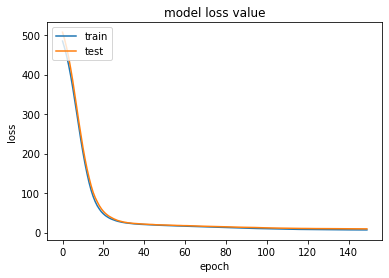

In [137]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss value')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Conclusion:
The  mean squared error achieved by example 2 above varied between 6 and 10 on different runnings of the notebook. The MSE measures the averaged squared difference between the predicted and actual values. The actual difference in dollars was between 2450 and 3162 (square root of 6 & 10).

#### References:

Harrison Jr, David, & Rubenfeld, Daniel, 1978, '*Hedonic Housing Prices and the Demand for Clean Air*', Journal of Environmental Economics & Management 5, 81-102 <br>
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html <br>
https://datavizcatalogue.com/methods/box_plot.html<br>
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.levene.html <br>
https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php<br>
https://pythonfordatascience.org/independent-t-test-python/ <br>
https://machinelearningmastery.com/parametric-statistical-significance-tests-in-python/<br>
http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html<br>
Chollet, F. 2018 *Deep Learning With Python*, Manning Publication Co., NY <br>
https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/<br>
https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155 <br>
https://machinelearningmastery.com/how-to-configure-the-number-of-layers-and-nodes-in-a-neural-network/<br>
https://towardsdatascience.com/activation-functions-and-its-types-which-is-better-a9a5310cc8f<br>
https://statistics.laerd.com/spss-tutorials/mann-whitney-u-test-using-spss-statistics.php<br>
McLaughlin, I 2019, Practical t-tests in Python, video lecture, Machine Learning & Statistics, Galway Mayo Institute of Technology, delivered 10th October 2019<br>
McLaughlin, I 2019, Dogs data set, video lecture, Machine Learning & Statistics, Galway Mayo Institute of Technology, delivered 17th November 2019<br>
McLaughlin, I 2019, Revisiting the Dogs data set, video lecture, Machine Learning & Statistics, Galway Mayo Institute of Technology, delivered 24th November 2019<br>

